In [2]:
import os
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as no

In [3]:
files = [file for file in os.listdir('../datasets')] #only two I need to work with
files = ['train.csv','test.csv' ]

In [4]:
files

['train.csv', 'test.csv']

In [5]:
ames = pd.read_csv(f'../datasets/{files[1]}')

First lets visualize the missing data

<AxesSubplot:>

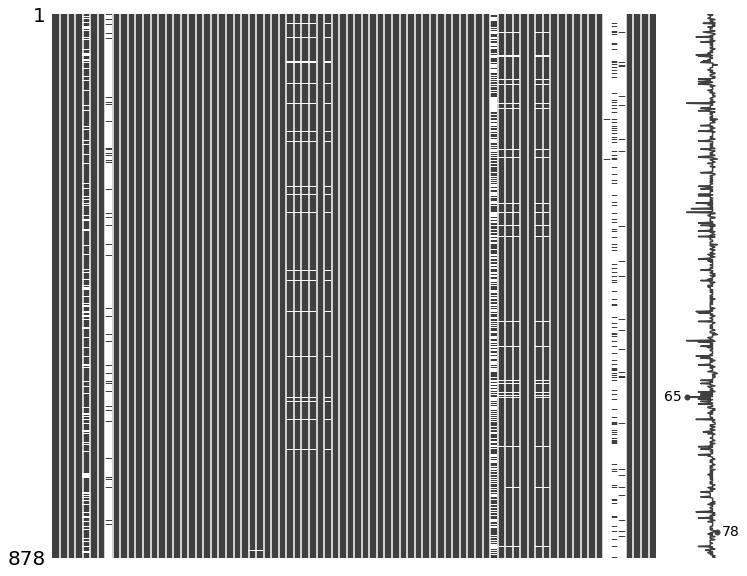

In [11]:


no.matrix(ames, figsize = (12,10))

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (81).

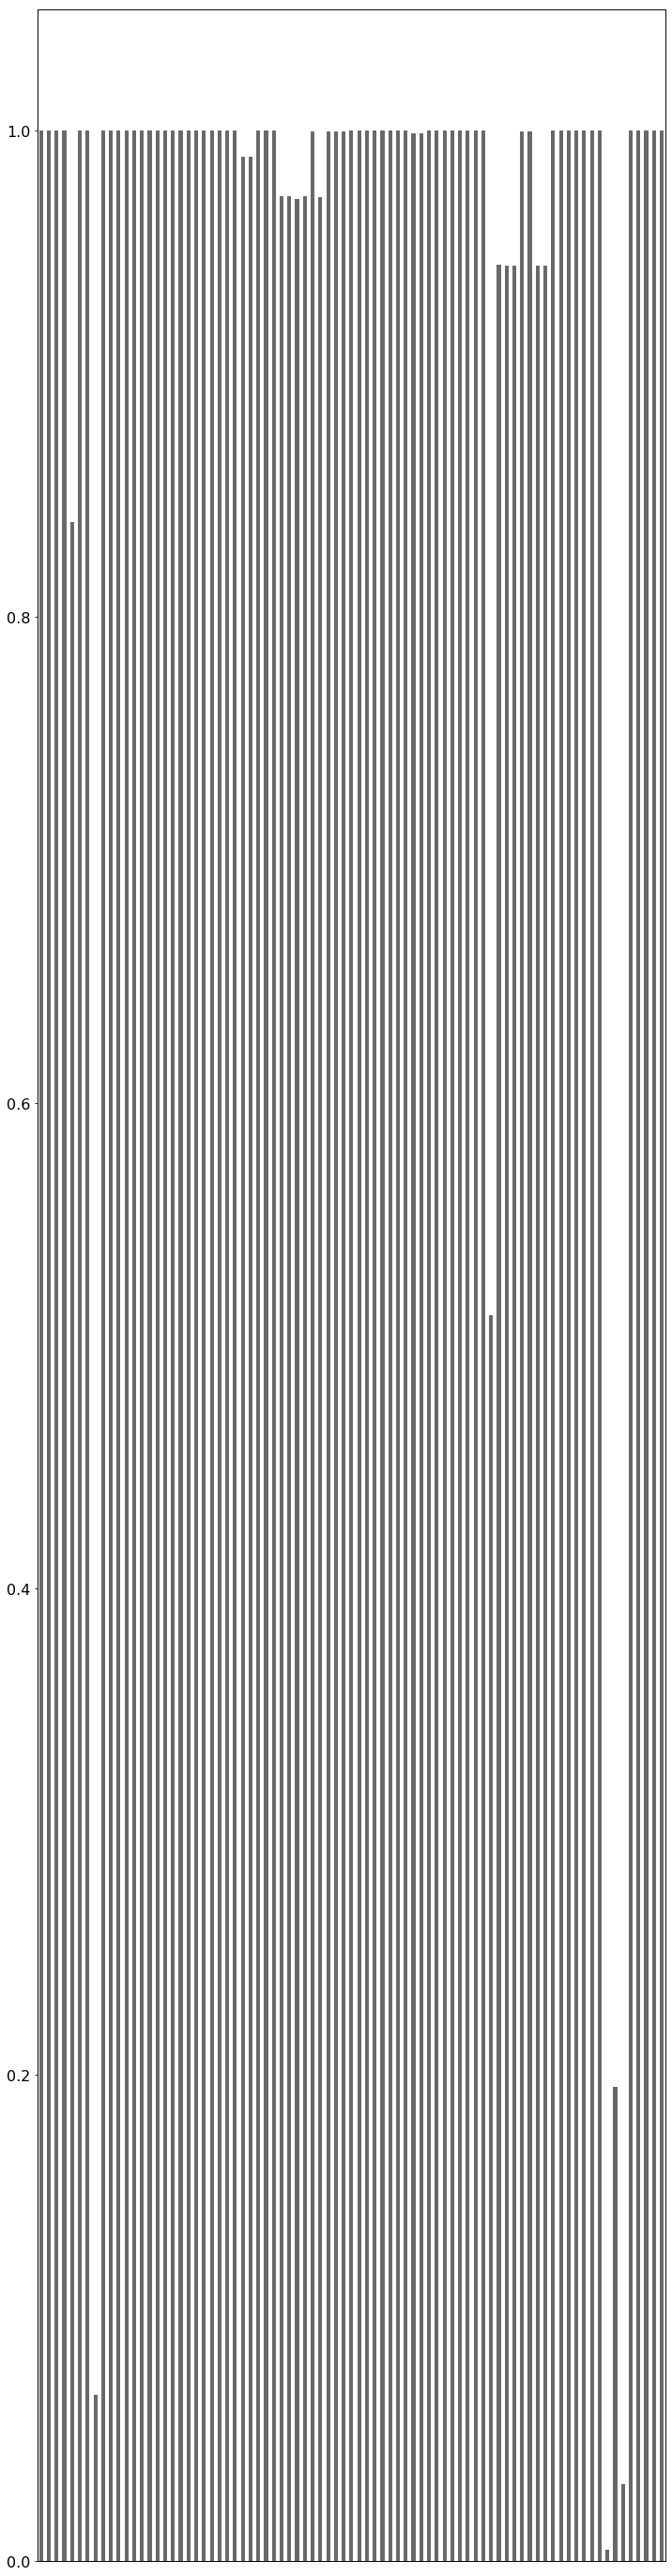

In [16]:
no.bar(ames, figsize = (12, 50))

There's not much data for Pool QC or alley. I'm tempted to drop them, but first I should know what they mean. Time to read the documentation(http://jse.amstat.org/v19n3/decock/DataDocumentation.txt). 

In [7]:
ames['Pool QC'].unique()

array([nan, 'Ex', 'TA'], dtype=object)

In [8]:
poolqc = ames[ ['Pool QC','SalePrice']]

KeyError: "['SalePrice'] not in index"

In [9]:
ames.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [10]:
ames['SalePrice']

KeyError: 'SalePrice'

In [21]:
poolqc.groupby('Pool QC').mean('SalePrice')

,SalePrice
Pool QC,
Ex,315000.0
Fa,215500.0
Gd,216492.5
TA,141500.0


<AxesSubplot:xlabel='Pool QC', ylabel='SalePrice'>

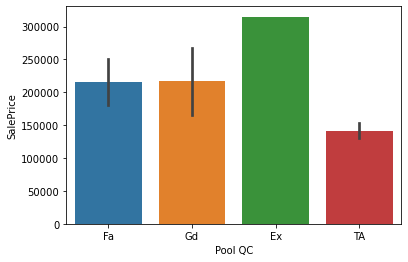

In [22]:
sns.barplot(x= 'Pool QC', y= 'SalePrice', data = poolqc)

it looks like pool QC is important. I'll keep it and convert the NaN to 'None' in a copy of the dataframe

In [23]:
ames_pool_corr = ames.copy()
ames_pool_corr['Pool QC'] = ames['Pool QC'].loc[ames['Pool QC'].isnull()==True] = 'None'

/home/michael/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [24]:
ames_pool_corr

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,None,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,None,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,None,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,None,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,None,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,None,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,None,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,None,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,None,NaN,NaN,0,11,2009,WD,144000


Now I'll decide what to do with the Alley, here's what the documentation says:

Alley (Nominal): Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

we'll repeat the process above actually lets just define a function cause I might do it again


In [25]:
def plot_na(col_name, df=ames):
    to_plot = df.loc[:, (col_name, 'SalePrice')]
    to_plot[col_name].fillna('None', inplace = True)
    to_plot.groupby(col_name).mean('SalePrice')
    sns.barplot(x= col_name, y= 'SalePrice', data = to_plot)
    display(to_plot.value_counts(col_name))

Alley
None    1911
Grvl      85
Pave      55
dtype: int64

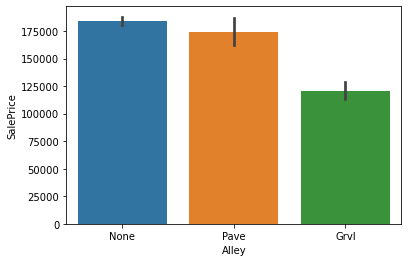

In [26]:
plot_na('Alley')

I wasn't expecting that, houses with gravel alleys sell for 50_000 less

In [27]:
ames_replace_2null = ames

In [28]:
ames_replace_2null['Alley'].fillna('None', inplace = True)

<AxesSubplot:>

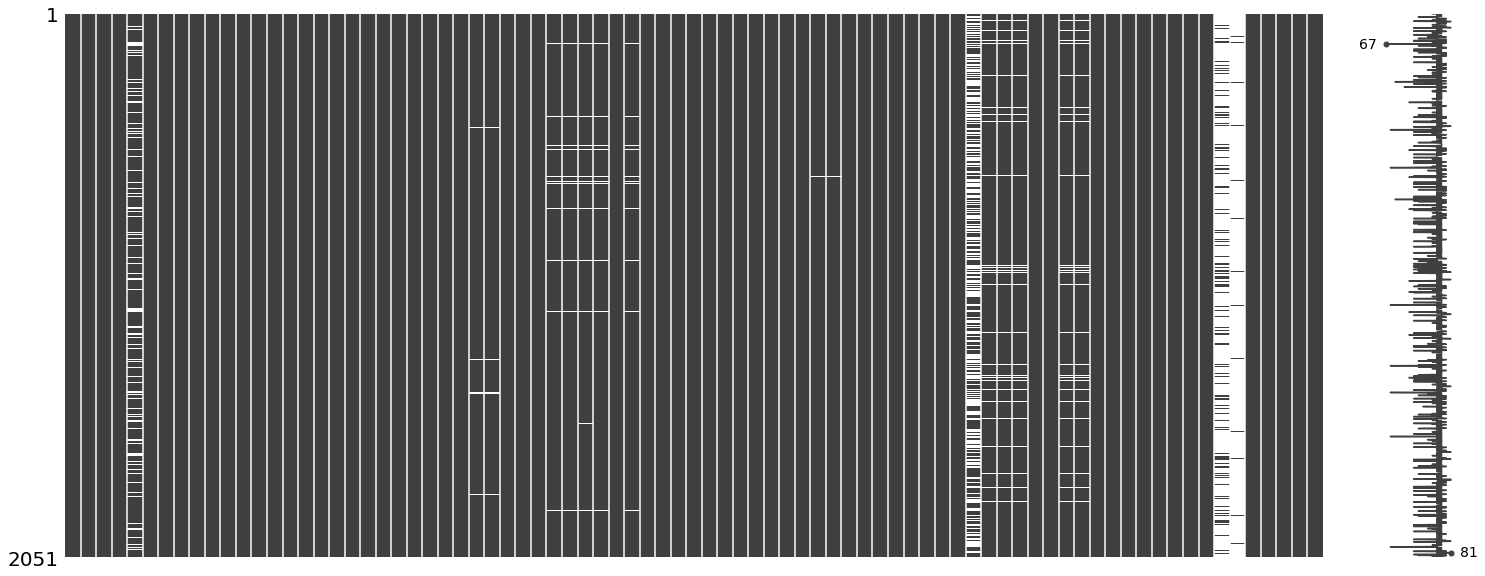

In [29]:
no.matrix(ames_replace_2null)

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (81).

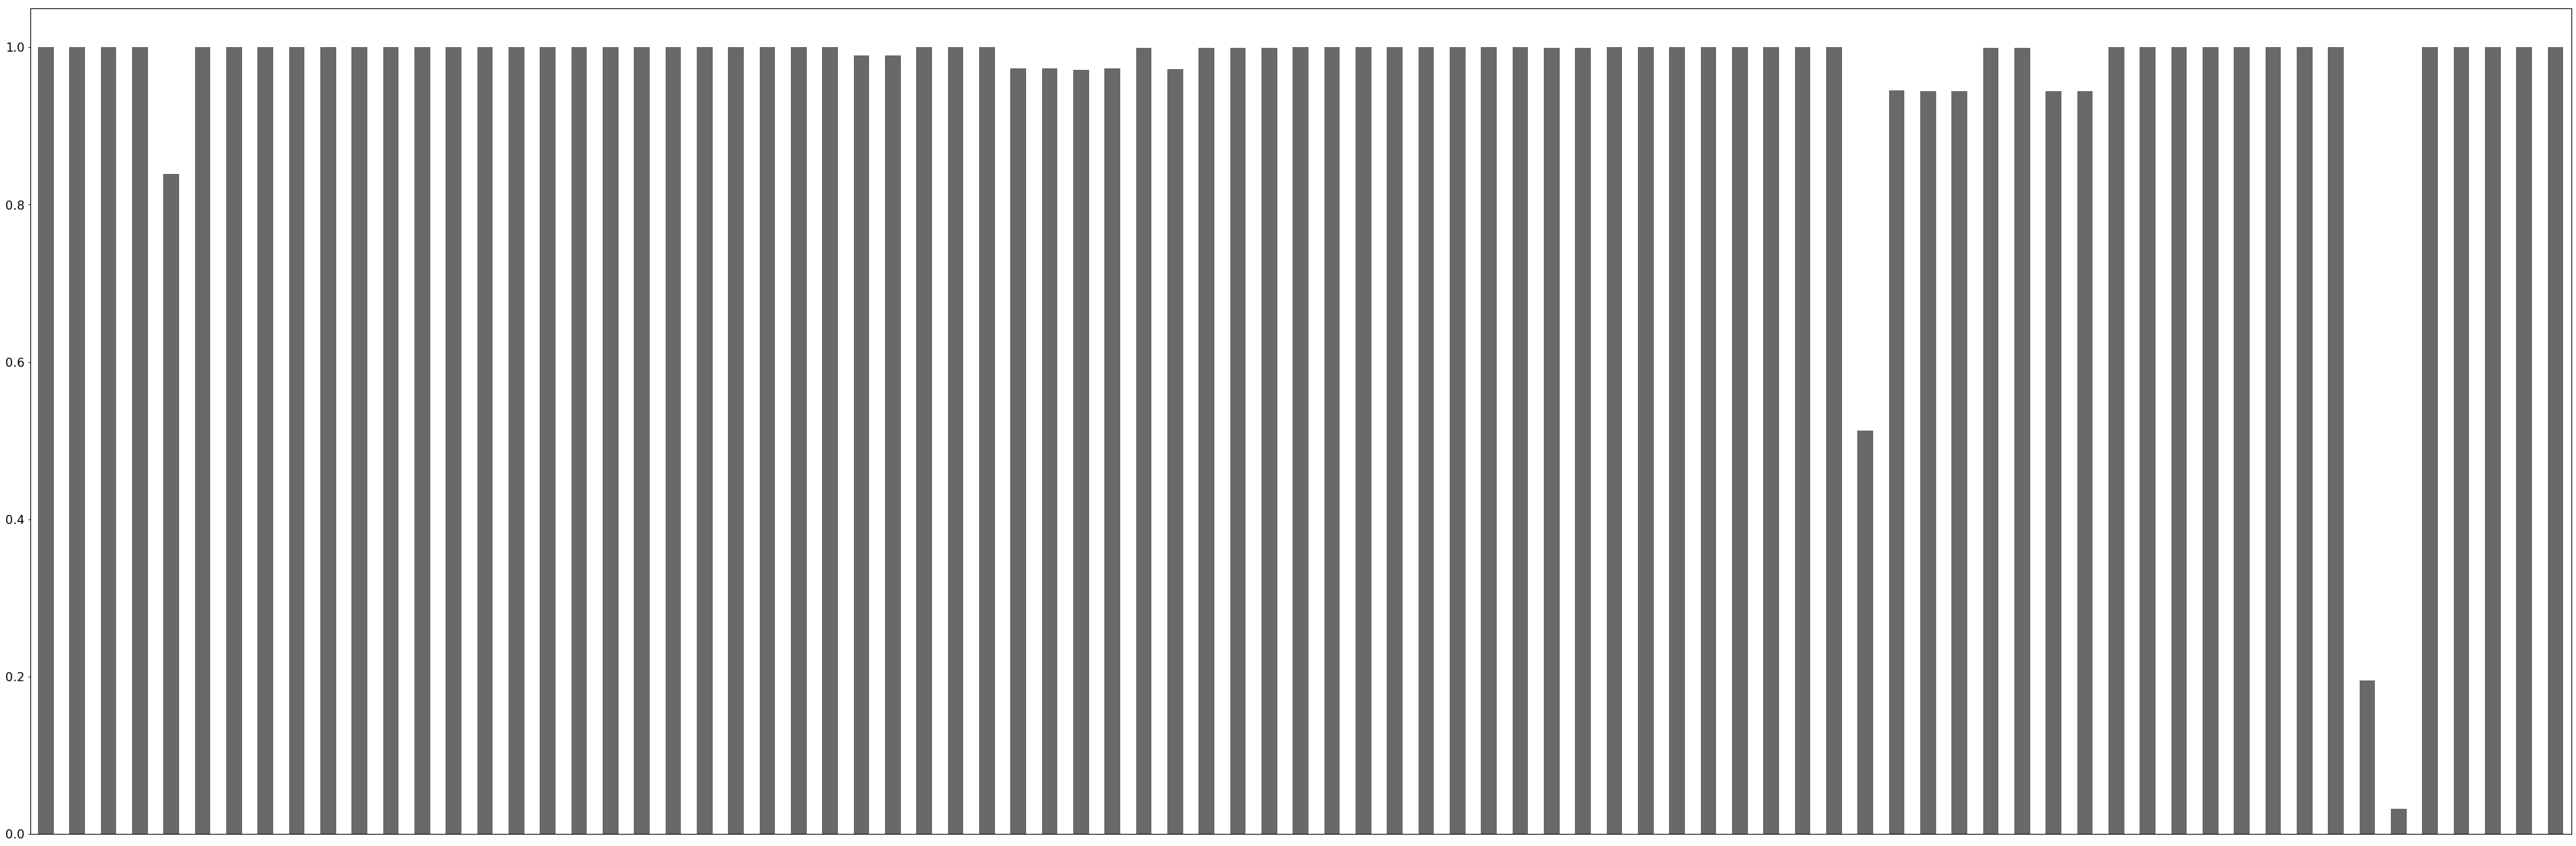

In [30]:
no.bar(ames_replace_2null, figsize = (60, 20))

Now I'll do misc. features:
doc:
Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
       
If I have to guess, other is going to be too generic to be much good but lets see

Misc Feature
None    1986
Shed      56
Gar2       4
Othr       3
Elev       1
TenC       1
dtype: int64

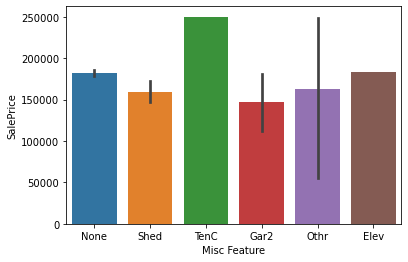

In [31]:
plot_na('Misc Feature')

A shed or 2nd garacge both seem to lower the value. Perhaps they're associated with more rural properties?

maybe I can define a new feature 'rural signs' that counts these signs of lower value rural properties. As I suspected. the error in the "other" category is too high to make it useful. how many are there

In [32]:
ames_replace_3null = ames_replace_2null.copy()
ames_replace_3null['Misc Feature'].fillna('None', inplace = True)

I'm tempted to drop this column from my model. Possible using 'shed' for rural signs as I said. the features with <5 entries aren't going to be statistically meaningful and just add noise

next up fence


Fence (Ordinal): Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
 OK so this one is ordinal, ill want to replace the values with numbers
 plot_na('Fence')

Fence
None     1651
MnPrv     227
GdPrv      83
GdWo       80
MnWw       10
dtype: int64

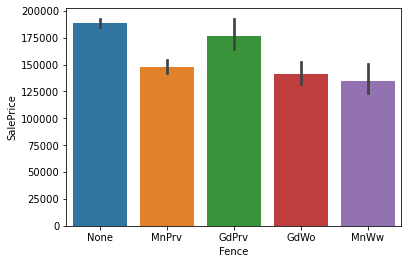

In [33]:
plot_na('Fence')

seems like the best fence is no fence. Not as big an effect as the others. But we have another feature that I associate with more rural areas, wire fencing pulling down the values. Good wood an min privacy pull it down significantly too, maybe associated with high crime areas maybe I should combine them with shed as less desirable count rather than rural count. My gut tells me to make "rural count" and "less desirable count" separate and either include wire fencing in both or make it worth half a point. No reason it can't be counted twice though. It's (potentially) indicative of two things 

In [34]:
ames_replace_4null = ames_replace_3null.copy()
ames_replace_4null['Fence'].fillna('None', inplace = True)

Thus far  Nan always meant none of the given feature I'm going to read the documentation see if it ever indicates a missing value

In [35]:
ames_replace_4null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            2051 non-null   object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

<AxesSubplot:>

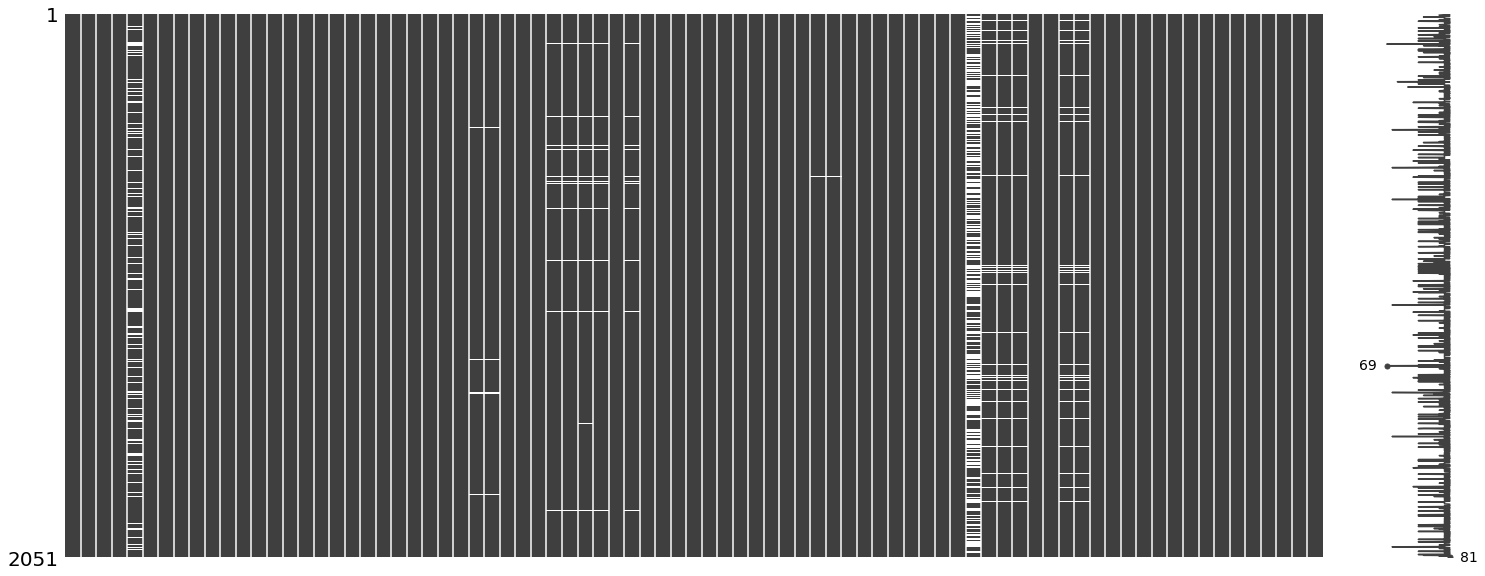

In [36]:
no.matrix(ames_replace_4null)

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (81).

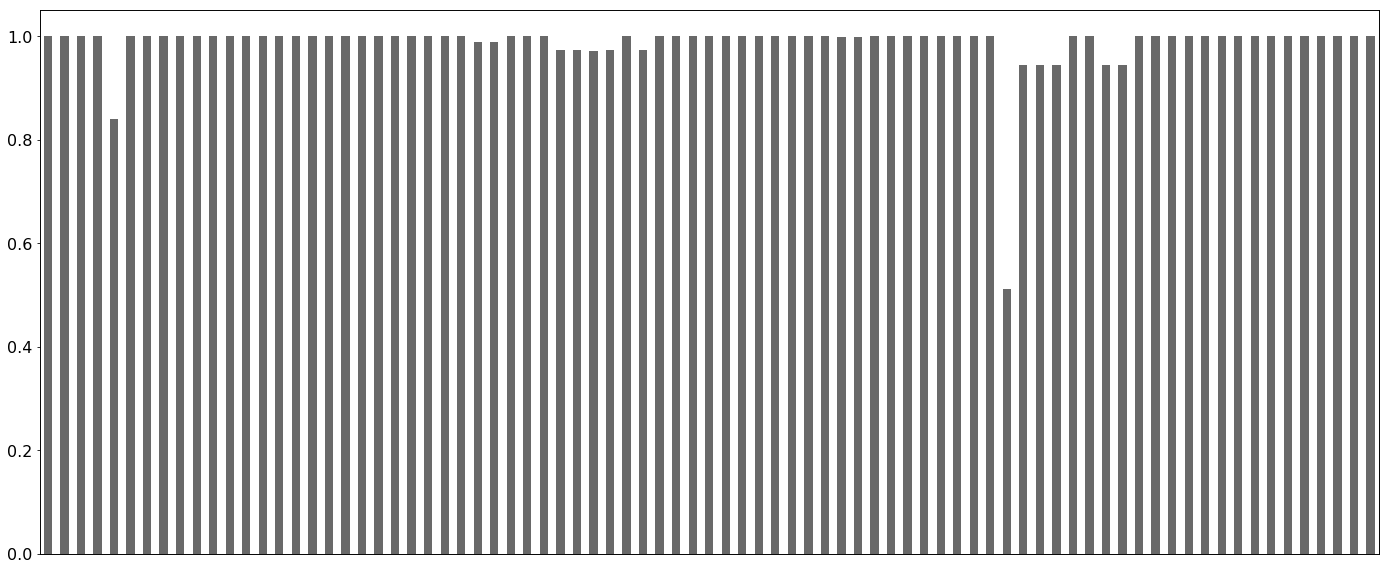

In [37]:
no.bar(ames_replace_4null)

Given that all for all the most frequennt missing data, Nan referred to a column not being applicable rather than the data not being available, I decided to check the documentation to see if that pattern held. It did. I also checked if it was all categorical data. Some was ordinal, but since I'll have to convert it to numeric data later anyway (if I want to treat it as Ordinal, it depends on whether price varies with it such the better x higher saleprice.. I'm just going to fill in None for the time being.

In [38]:
ames_no_null = ames_replace_4null.copy()

In [39]:
ames.fillna('None', inplace = True)

In [40]:
ames_no_null

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,None,IR1,HLS,...,0,0,None,None,None,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,None,Reg,Bnk,...,0,0,None,None,None,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,11,2009,WD,144000


In [41]:
### Save that for EDA and feature engineering 
ames.to_pickle('../datasets/pickles/ames_no_null.pkl')

# I'll likely need to do some more cleaning, but I'll move to the EDA notebook for now to get a better sense of what I need to clean